In [1]:
# Surface Group

In [2]:
import numpy as np
import pandas as pd
from volumetricspy import Surface, SurfaceGroup
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
s1 = Surface.from_z_map('anticline','anticline',crs=3117)

sg1 = SurfaceGroup(name='Test')

sg1.add_surface(s1)

/opt/anaconda3/envs/volumetricspy/lib/python3.8/site-packages/zmapio/zmap.py:189: UserWarning: to_dataframe will be renamed to to_pandas in 0.7.0
  warnings.warn("to_dataframe will be renamed to to_pandas in 0.7.0")


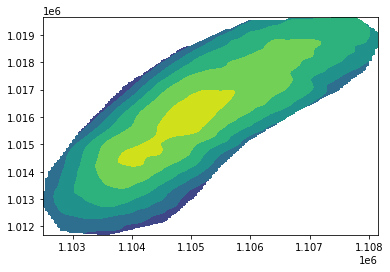

In [5]:
sg1.surfaces['anticline'].contourf()

In [6]:
sg1.create_parallel_surfaces('anticline',[-180,-250,-320])

In [7]:
sg1.surfaces.keys()

dict_keys(['anticline', 'anticline_-180.0', 'anticline_-250.0', 'anticline_-320.0'])

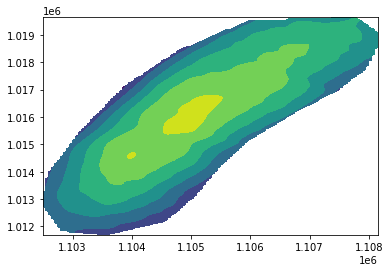

In [8]:
sg1.surfaces['anticline_-180.0'].contourf()

In [9]:

rv, area = sg1.get_volume_bounds(
    top_surface = 'anticline',
    bottom_surface = 'anticline_-180.0',
    method ='contours',
    zmin = -5400,zmax=-4900
)
rv

800015.9260285863

<AxesSubplot:xlabel='index', ylabel='area_top'>

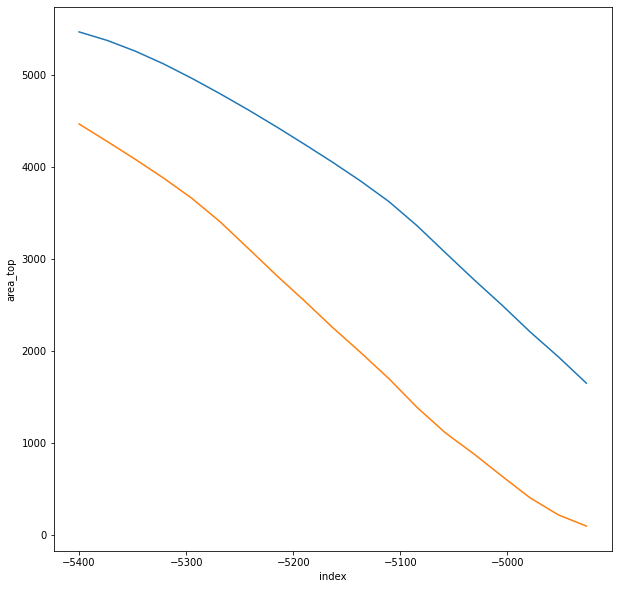

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(data=area.reset_index(),x='index',y='area_top',ax=ax)
sns.lineplot(data=area.reset_index(),x='index',y='area_bottom',ax=ax)

In [11]:
surv1_grid = sg1.surfaces['anticline'].make_grid(dz=-100,nz=5)

In [ ]:
#surv1_vtk.plot()

In [12]:
surv_grid_vtk = surv1_grid.unstructured_grid_vtk()

/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/grid.py:921: UserWarning: VTK 9 no longer accepts an offset array
  grid = pv.UnstructuredGrid(offset, cells, cell_type, points)


In [13]:
surv_grid_vtk.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [ ]:
surv_grid_vtk.save('test.vtk')

In [14]:
surv_grid_vtk

UnstructuredGrid (0x7f7ff8d62ee0)
  N Cells:	71868
  N Points:	574944
  X Bounds:	1.102e+06, 1.108e+06
  Y Bounds:	1.012e+06, 1.020e+06
  Z Bounds:	-6.058e+03, -4.708e+03
  N Arrays:	1

In [15]:
surv1_grid.nz

4